# Computer Vision

## The convolution operator

**Dense layers**  
Learn global patterns in their input feature space (for example, for a MNIST digit, patterns involving all pixels).  
**Convolution layers**  
Learn local patterns (in the case of images, patterns found in small 2D windows of the inputs).


#### Convnet Properties
* The patterns they learn are translation invariant.
* They can learn spatial hierarchies of patterns


#### Two key parameters that define a convolution
* Size of the patches extracted from the inputs — typically 3 × 3 or 5 × 5.
* Depth of the output feature map — the number of filters computed by the convolution.

They are the **first two** arguments passed to the layer.  
convnet_args = `Conv2D(output_depth, (window_height, window_width))`
1. The window slides over every location of an image, extracting the 3D (input) patch of surrounding features.  
input_shape = `(image_height, image_width, image_channels)`  
window shape = `(window_height, window_width, input_depth)`
2. Each 3D patch is transformed (with a convolutional kernel) into a 1D vector (transformed patches).  
transformed_shape = `(output_depth,)`.
3. All of the 1D vectors are reassembled into a 3D output feature map.  
output_shape = `(image_height, image_width, output_depth)`.

conv2d 1x1  uses 3x3 in previous  
conv2d 2x2  uses 4x4 in previous  
conv2d 3x3  uses 5x5 in previous  
(strides=(1, 1))  

max_pool 1x1 uses 2x2 in previous  
max_pool 2x2 uses 4x4 in previous  
max_pool 4x4 uses 8x8 in previous  
(strides=(2, 2))  

**Without max_pool**  
(no padding)  
3x3 window in third conv2d created using 5x5 window in 2nd conv2d  
5x5 window in second conv2d created using 7x7 window in 1st conv2d  
7x7 window in 1st conv2d created using 9x9 image

22x22 window in third conv2d created using 24x24 window in 2nd conv2d  
24x24 window in second conv2d created using 26x26 window in 1st conv2d  
26x26 window in 1st conv2d created using 28x28 image


**With max_pool**  
(no padding)  
3x3 window in third conv2d created using 5x5 window in second max_pooling  
5x5 window in second max_pooling created using 10x10 window in second conv2d  
10x10 window in second conv2d created using 12x12 window in first max_pooling  
12x12 window in first max_pooling created using 24x24 window in first conv2d  
24x24 window in first conv2d created using 26x26 image

#### References
* convolution layers:  
https://www.youtube.com/watch?v=KuXjwB4LzSA

* maxpool layers:  
https://www.youtube.com/watch?v=8oOgPUO-TBY

#### Additional notes
* Text

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## MNIST

In [2]:
from keras import layers, models
from keras.utils import to_categorical

from keras.datasets import mnist

### Data

training data: (60000, 28, 28) [5 0 4 ... 5 6 8]
testing data: (60000, 28, 28) [7 2 1 ... 4 5 6]


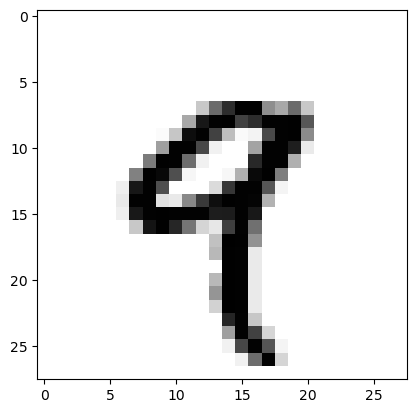

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("training data:", train_images.shape, train_labels)
print("testing data:", train_images.shape, test_labels)

digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Network architecture

#### Without convnets

In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Network architecture
network = models.Sequential()
network.add(layers.Dense(512, activation="relu", input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation="softmax"))

network.summary()

# Compilation step
network.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

# Prepare image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

print("train_images.shape:", train_images.shape)
print("train_labels:", train_labels)
print("test_images.shape:", test_images.shape)
print("test_labels:", test_labels)

# Prepare labels data
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print("1st train_label (to categorical):", train_labels[0])
print("1st test_label (to categorical):", test_labels[0])

# Train model
network.fit(train_images, train_labels, epochs=5, batch_size=128)

# Evaluate model
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test_acc:", test_acc)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
train_images.shape: (60000, 784)
train_labels: [5 0 4 ... 5 6 8]
test_images.shape: (10000, 784)
test_labels: [7 2 1 ... 4 5 6]
1st train_label (to categorical): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
1st test_label (to categorical): [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2668 - accuracy: 0.9230
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1086 - accu

#### With convnets 

##### Max Pooling

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Network architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

# Compilation step
model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

# Prepare image data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

print("train_images.shape:", train_images.shape)
print("train_labels:", train_labels)
print("test_images.shape:", test_images.shape)
print("test_labels:", test_labels)

# Prepare labels data
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print("1st train_label (to categorical):", train_labels[0])
print("1st test_label (to categorical):", test_labels[0])

print(train_labels)
print(test_labels)

# Train model
model.fit(train_images, train_labels, epochs=5, batch_size=64)

# Evaluate model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_acc:", test_acc)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

##### No Max Pooling

In [8]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Network architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # shape (3, 3, 64)
model.add(layers.Flatten()) # flatten 3D tensor into 1D tensor shape (576,) where 576 = 3 * 3 * 64
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

# Compilation step
model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

# Prepare image data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

print("train_images.shape:", train_images.shape)
print("train_labels:", train_labels)
print("test_images.shape:", test_images.shape)
print("test_labels:", test_labels)

# Prepare labels data
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print("1st train_label (to categorical):", train_labels[0])
print("1st test_label (to categorical):", test_labels[0])

# Train model
model.fit(train_images, train_labels, epochs=5, batch_size=64)

# Evaluate model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_acc:", test_acc)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 30976)             0         
                                                                 
 dense_8 (Dense)             (None, 64)                1982528   
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 2,038,922
Trainable params: 2,038,922
No

## Dogs vs Cats: binary classification

### 0. Data set-up

#### Separate data into direcrories

In [9]:
import sys
import pathlib

sys.path.append("..")

PROJECT = "dogs_vs_cats"

PROJECT_DATA_DIR = f"../data/{PROJECT}/"
RAW_DATA_DIR = pathlib.Path(f"{PROJECT_DATA_DIR}/raw")
TRAIN_DATA_DIR = pathlib.Path(f"{PROJECT_DATA_DIR}/train")
VALIDATION_DATA_DIR = pathlib.Path(f"{PROJECT_DATA_DIR}/validation")
TEST_DATA_DIR = pathlib.Path(f"{PROJECT_DATA_DIR}/test")

TRAIN_CATS_DIR = pathlib.Path(f"{TRAIN_DATA_DIR}/cats")
TRAIN_DOGS_DIR = pathlib.Path(f"{TRAIN_DATA_DIR}/dogs")
VALIDATION_CATS_DIR = pathlib.Path(f"{VALIDATION_DATA_DIR}/cats")
VALIDATION_DOGS_DIR = pathlib.Path(f"{VALIDATION_DATA_DIR}/dogs")
TEST_CATS_DIR = pathlib.Path(f"{TEST_DATA_DIR}/cats")
TEST_DOGS_DIR = pathlib.Path(f"{TEST_DATA_DIR}/dogs")

MODELS_DIR = f"../models/{PROJECT}/"

In [10]:
import shutil

def separate_images(animal, dir, start, end):
    """ Separate images from RAW_DATA_DIR to TRAIN_DATA_DIR, VALIDATION_DATA_DIR, and TEST_DATA_DIR"""
    fnames = [f"{animal}.{i}.jpg" for i in range(start, end)]
    for fname in fnames:
        src = RAW_DATA_DIR / fname
        dst = dir / fname
        shutil.copyfile(src, dst)

# Separate images
separate_images("cat", TRAIN_CATS_DIR, 0, 1000)
separate_images("cat", VALIDATION_CATS_DIR, 1000, 1500)
separate_images("cat", TEST_CATS_DIR, 1500, 2000)

separate_images("dog", TRAIN_DOGS_DIR, 0, 1000)
separate_images("dog", VALIDATION_DOGS_DIR, 1000, 1500)
separate_images("dog", TEST_DOGS_DIR, 1500, 2000)

In [4]:
import os

print('total training cat images:', len(os.listdir(TRAIN_CATS_DIR)))
print('total training dog images:', len(os.listdir(TRAIN_DOGS_DIR)))
print('total validation cat images:', len(os.listdir(VALIDATION_CATS_DIR)))
print('total validation dog images:', len(os.listdir(VALIDATION_DOGS_DIR)))
print('total test cat images:', len(os.listdir(TEST_CATS_DIR)))
print('total test dog images:', len(os.listdir(TEST_DOGS_DIR)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


### 1. Train small model from scratch

#### Network architecture

In [13]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 128)     

c:\Users\tmane\miniconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


#### Preparing the data

Turn image files on disk into batches of preprocessed tensors:

1. Read the picture files.
2. Decode the JPEG content to RGB grids of pixels.
3. Convert these into floating-point tensors.
4. Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

This can all be done with the ImageDataGenerator class.

In [14]:
from keras.preprocessing.image import ImageDataGenerator
import scipy as scipy

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary') # because we use binary_crossentropy loss, we need binary labels

validation_generator = test_datagen.flow_from_directory(
    VALIDATION_DATA_DIR,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary') # because we use binary_crossentropy loss, we need binary labels

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 37s 358ms/step - loss: 0.6883 - acc: 0.5370 - val_loss: 0.6704 - val_acc: 0.5880
Epoch 2/30
100/100 [==============================] - 30s 296ms/step - loss: 0.6591 - acc: 0.6170 - val_loss: 0.6453 - val_acc: 0.6280
Epoch 3/30
100/100 [==============================] - 32s 319ms/step - loss: 0.6121 - acc: 0.6740 - val_loss: 0.6149 - val_acc: 0.6600
Epoch 4/30
100/100 [==============================] - 28s 278ms/step - loss: 0.5692 - acc: 0.7000 - val_loss: 0.6016 - val_acc: 0.6590
Epoch 5/30
100/100 [==============================] - 27s 270ms/step - loss: 0.5398 - acc: 0.7265 - val_loss: 0.5864 - val_acc: 0.6700
Epoch 6/30
100/100 [==============================] - 28s 277ms/step - loss: 0.5023 - acc: 0.7555 - val_loss: 0.5792 - val_acc: 0.6870
Epoch 7/30
100/100 [==============================] - 27s 271ms/step - loss: 0.4678 - acc: 0.7835 - val_loss: 0.5650 - val_acc: 0.7170
Epoch 8/30
100/100 [==============================] - 2

In [17]:
model.save(f'{MODELS_DIR}/cats_and_dogs_small_1.h5')


In [18]:
from keras import models
model = models.load_model(f'{MODELS_DIR}/cats_and_dogs_small_1.h5')

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

#### Plot loss and accuracy

In [20]:
def plot_loss_and_accuracy(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(1, len(acc) + 1)

    # Plot training and validation loss
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plot training and validation accuracy
    plt.figure()
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

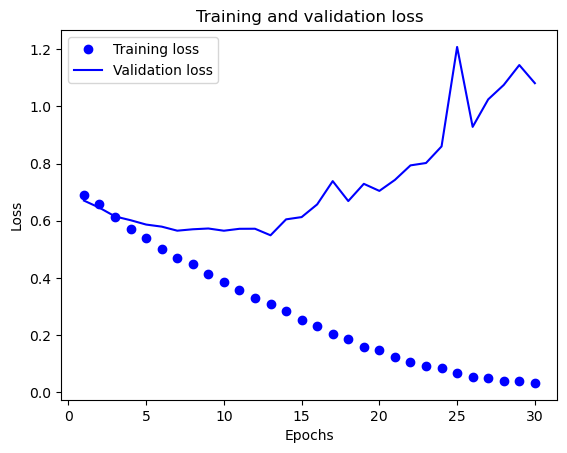

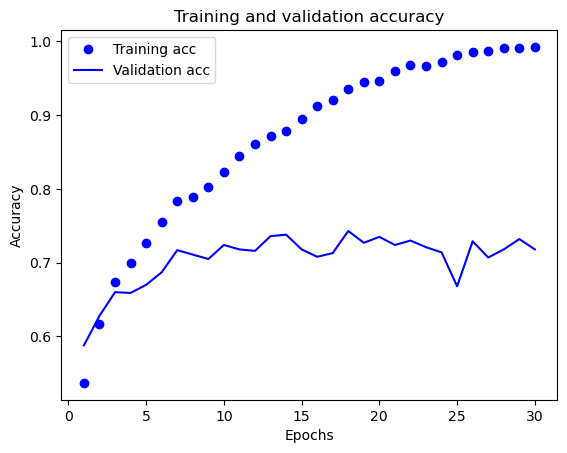

In [21]:
plot_loss_and_accuracy(history)

#### Data Augmentation

In [22]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

##### Display some randomly augmented training images

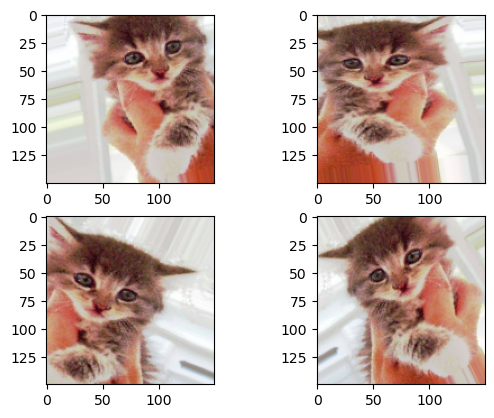

In [30]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

fnames = [os.path.join(TRAIN_CATS_DIR, fname) for fname in os.listdir(TRAIN_CATS_DIR)]

img_path = fnames[3] # chooses one image to augment
img = image.load_img(img_path, target_size=(150, 150)) # reads the image and resizes it

x = image.img_to_array(img) # converts it to a Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape) # reshapes it to (1, 150, 150, 3)


# Creates a 2x2 subplot
fig, axs = plt.subplots(2, 2)

# Generates batches of randomly transformed images.
# Loops indefinitely, so you need to break the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    imgplot = axs[i//2, i%2].imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

#### Defining a new convnet that includes dropout

In [22]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

c:\Users\tmane\miniconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


####  Training the convnet using data-augmentation generators

In [31]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
    )

validation_generator = test_datagen.flow_from_directory(
    VALIDATION_DATA_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
    )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [35]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
    )

Epoch 1/100
100/100 [==============================] - 26s 261ms/step - loss: 0.5914 - acc: 0.6830 - val_loss: 0.5396 - val_acc: 0.7220


In [ ]:
model.save('cats_and_dogs_small_2.h5')

#### Plot loss and accuracy

In [21]:
plot_loss_and_accuracy(history)

### 2. Feature extraction using a pretrained covnet

Convnets used for image classification comprise two parts:
1. convolutional base  
(The feature maps of a convnet are presence maps of generic concepts over a picture, which is likely to be useful regardless of the computer-vision problem at hand.)
2. Densely connected classifier  
(The representations learned by the classifier are specific to the set of classes on which the model was trained and no longer contain information on where objects are located in the input image.)

In [56]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', # specifies the weight checkpoint from which to initialize the model
                  include_top=False, # excludes the densely connected classifier on top of the network
                  input_shape=(150, 150, 3) # specifies the shape of the image tensors that you’ll feed to the network (OPTIONAL)
                  )

In [57]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

#### 1. Run convolutional base over dataset and use output as input in standalone, densely connected classifier

In [38]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(TRAIN_DATA_DIR, 2000)
validation_features, validation_labels = extract_features(VALIDATION_DATA_DIR, 1000)
test_features, test_labels = extract_features(TEST_DATA_DIR, 1000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 1s 823ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 832ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 877ms/step


The extracted features are currently of shape `(samples, 4, 4, 512)`. You’ll feed them to a densely connected classifier, so first you must flatten them to `(samples, 8192)`:

In [39]:
train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))

At this point, you can define your densely connected classifier (note the use of dropout for regularization) and train it on the data and labels that you just recorded

In [40]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

c:\Users\tmane\miniconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
100/100 [==============================] - 2s 16ms/step - loss: 0.6015 - acc: 0.6750 - val_loss: 0.4516 - val_acc: 0.8260
Epoch 2/30
100/100 [==============================] - 1s 12ms/step - loss: 0.4305 - acc: 0.8055 - val_loss: 0.3676 - val_acc: 0.8670
Epoch 3/30
100/100 [==============================] - 1s 12ms/step - loss: 0.3697 - acc: 0.8440 - val_loss: 0.3235 - val_acc: 0.8860
Epoch 4/30
100/100 [==============================] - 1s 12ms/step - loss: 0.3289 - acc: 0.8605 - val_loss: 0.3106 - val_acc: 0.8690
Epoch 5/30
100/100 [==============================] - 1s 12ms/step - loss: 0.2880 - acc: 0.8905 - val_loss: 0.2821 - val_acc: 0.8900
Epoch 6/30
100/100 [==============================] - 1s 14ms/step - loss: 0.2716 - acc: 0.8855 - val_loss: 0.2845 - val_acc: 0.8780
Epoch 7/30
100/100 [==============================] - 1s 13ms/step - loss: 0.2587 - acc: 0.8960 - val_loss: 0.2708 - val_acc: 0.8970
Epoch 8/30
100/100 [==============================] - 1s 14ms/step - 

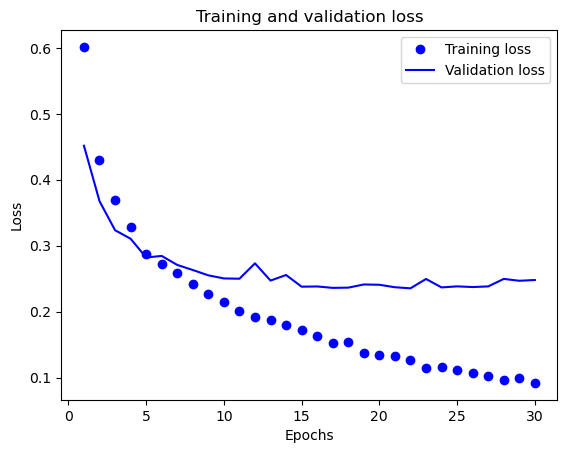

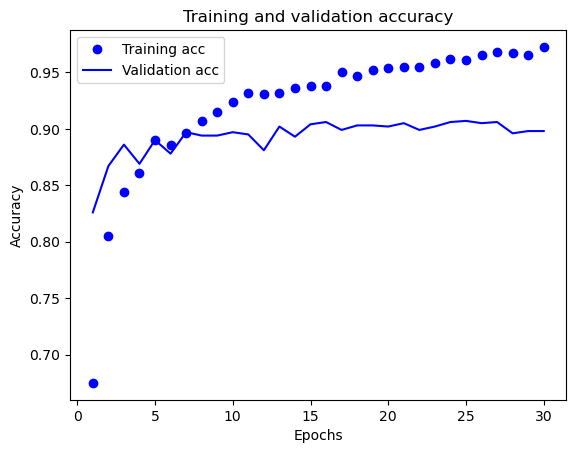

In [41]:
plot_loss_and_accuracy(history)

In [43]:
#model.save(f'{MODELS_DIR}/cats_and_dogs_conv_base_1.h5')

from keras import models
model = models.load_model(f'{MODELS_DIR}/cats_and_dogs_conv_base_1.h5')

#### 2. Feature Extraction with Data Augmentation: extend `conv_base` and run the whole thing end to end on the input data

In [58]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base) # adds the convolutional base of VGG16
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 8192)              0         
                                                                 
 dense_24 (Dense)            (None, 256)               2097408   
                                                                 
 dense_25 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [59]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [60]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 8192)              0         
                                                                 
 dense_24 (Dense)            (None, 256)               2097408   
                                                                 
 dense_25 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


##### Training the model end to end with a frozen convolutional base

In [61]:
# Use GPU!

from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    VALIDATION_DATA_DIR,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [63]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 130s 1s/step - loss: 0.5892 - acc: 0.6895 - val_loss: 0.4789 - val_acc: 0.7660
Epoch 2/30
100/100 [==============================] - 139s 1s/step - loss: 0.4748 - acc: 0.7785 - val_loss: 0.3664 - val_acc: 0.8470
Epoch 3/30
100/100 [==============================] - 151s 2s/step - loss: 0.4230 - acc: 0.8200 - val_loss: 0.3188 - val_acc: 0.8730
Epoch 4/30
100/100 [==============================] - 139s 1s/step - loss: 0.3997 - acc: 0.8200 - val_loss: 0.3115 - val_acc: 0.8780
Epoch 5/30
100/100 [==============================] - 146s 1s/step - loss: 0.3751 - acc: 0.8465 - val_loss: 0.2833 - val_acc: 0.8870
Epoch 6/30
100/100 [==============================] - 147s 1s/step - loss: 0.3609 - acc: 0.8345 - val_loss: 0.2709 - val_acc: 0.9020
Epoch 7/30
100/100 [==============================] - 149s 1s/step - loss: 0.3434 - acc: 0.8545 - val_loss: 0.2629 - val_acc: 0.9010
Epoch 8/30
100/100 [==============================] - 156s 2s/step - 

In [64]:
model.save(f'{MODELS_DIR}/cats_and_dogs_extend_conv_base_1.h5')

# from keras import models
# model = models.load_model(f'{MODELS_DIR}/cats_and_dogs_conv_base_1.h5')

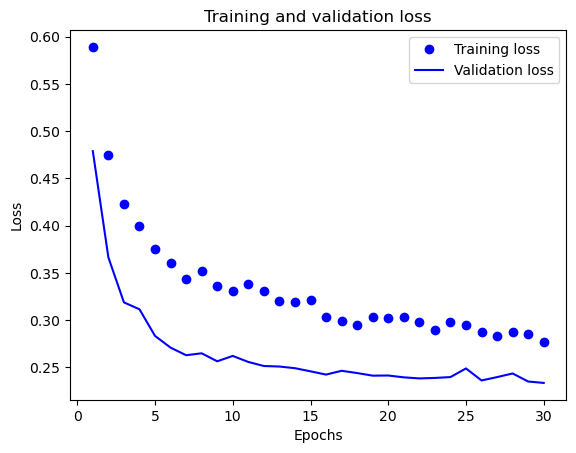

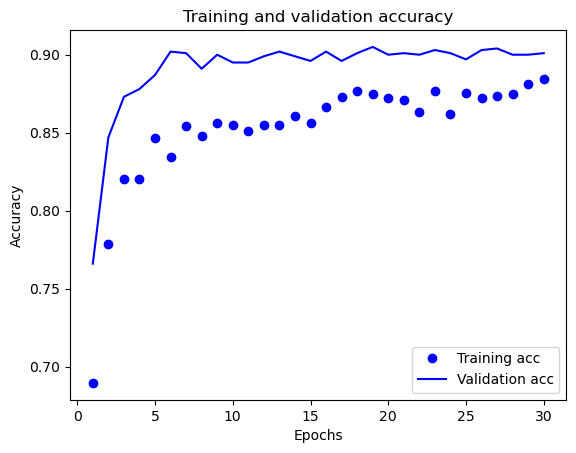

In [67]:
plot_loss_and_accuracy(history)

### 3. Fine-tuning

Steps for fine-tuning a network are as follow:
1. Add your custom network on top of an already-trained base network.
2. Freeze the base network.
3. Train the part you added.
4. Unfreeze some layers in the base network.
5. Jointly train both these layers and the part you added.

In [70]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [71]:
# Freezing all layers up to a specific one
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [74]:
# Fine-tuning the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
 34/100 [=========>....................] - ETA: 1:10 - loss: 0.3047 - acc: 0.8544

KeyboardInterrupt: 

In [ ]:
plot_loss_and_accuracy(history)

## Smoothing the plots
# INSERT SMOOTHING CODE? CREATE SMOOTHING FUNCTION?
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

# INCORPORATE SMOOTHING INTO PLOTTING FUNCTION